<a href="https://colab.research.google.com/github/mukul-mschauhan/classification/blob/main/Logistic_Regression%20%26%20Decision%20Tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [4]:
admission = pd.read_csv("/content/Admission_Predict.csv")
admission.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,118,290,104,4,2.0,2.5,7.46,0,0
1,378,290,100,1,1.5,2.0,7.56,0,0
2,484,290,104,4,2.0,2.5,7.46,0,1
3,169,293,97,2,2.0,4.0,7.80,1,0
4,462,293,97,2,2.0,4.0,7.80,1,0


<Axes: xlabel='Chance of Admit', ylabel='count'>

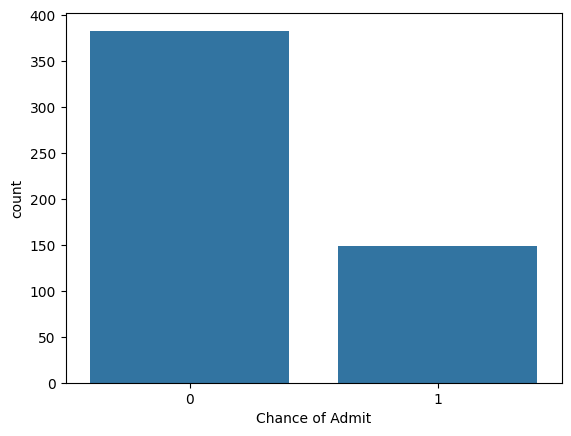

In [ ]:
# Targtet Variable
sns.countplot(x = "Chance of Admit", data = admission)

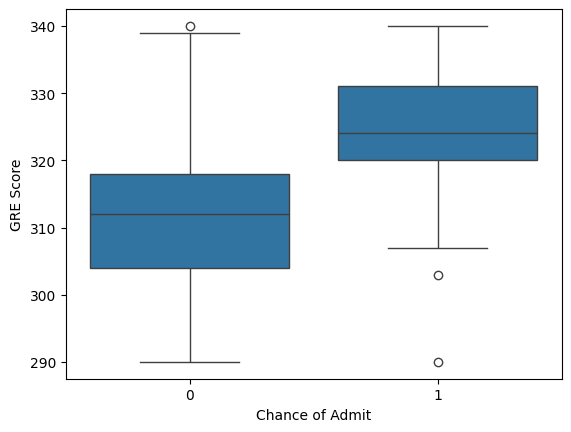

In [ ]:
# Checking if GRE Score has relation with Chance of Admit

sns.boxplot(x = "Chance of Admit", y = "GRE Score", data = admission)
plt.show()

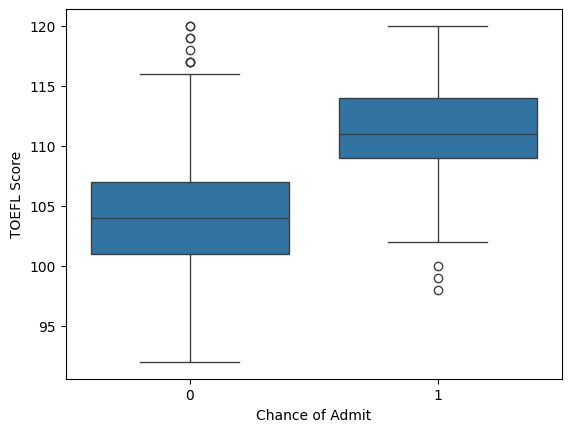

In [ ]:
sns.boxplot(x = "Chance of Admit", y = "TOEFL Score", data = admission)
plt.show()

Higher the GRE and TOEFL Scores, More are the Chances of Getting Selected

In [ ]:
cols = ['University Rating', 'SOP',
       'LOR', 'CGPA', 'Research']

# Ho: Predictors and target are not related.
# Ha: They are Related.

import scipy.stats as stats
for i in cols:
  tbl = pd.crosstab(admission.loc[:, i], admission["Chance of Admit"])
  teststats, pvalue, dof, exp = stats.chi2_contingency(tbl)
  print(f'{i} pvalue: {pvalue}')

University Rating pvalue: 1.0215604610817784e-31
SOP pvalue: 3.612815040517422e-25
LOR pvalue: 6.953521624367145e-24
CGPA pvalue: 1.3282526078088893e-12
Research pvalue: 4.756196876234514e-22


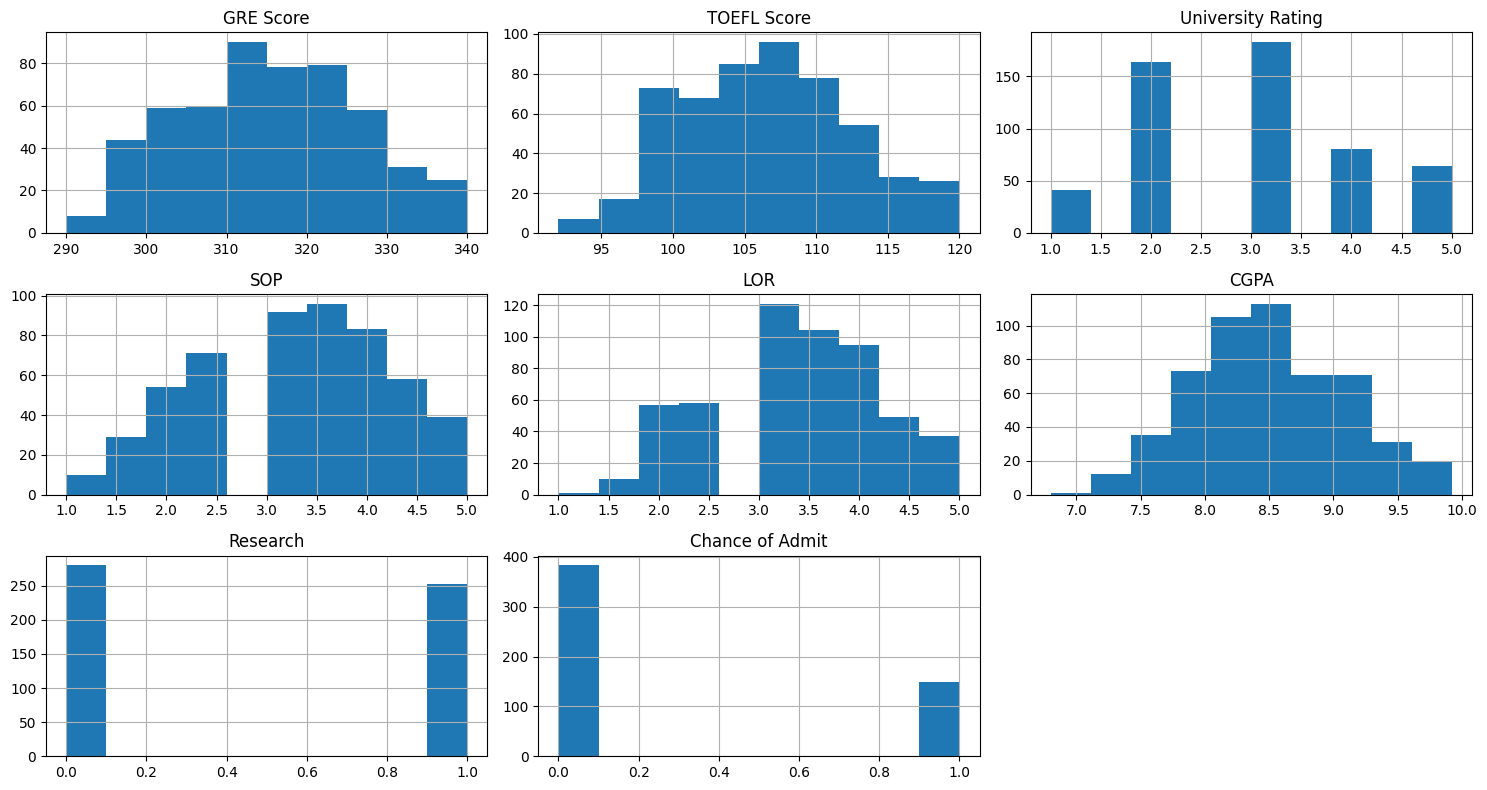

In [5]:
# Check the Distribution of the Data

admission.drop("Serial No.", axis = 1, inplace = True)

plt.rcParams['figure.figsize'] = [15, 8]
admission.hist()
plt.tight_layout()
plt.show()

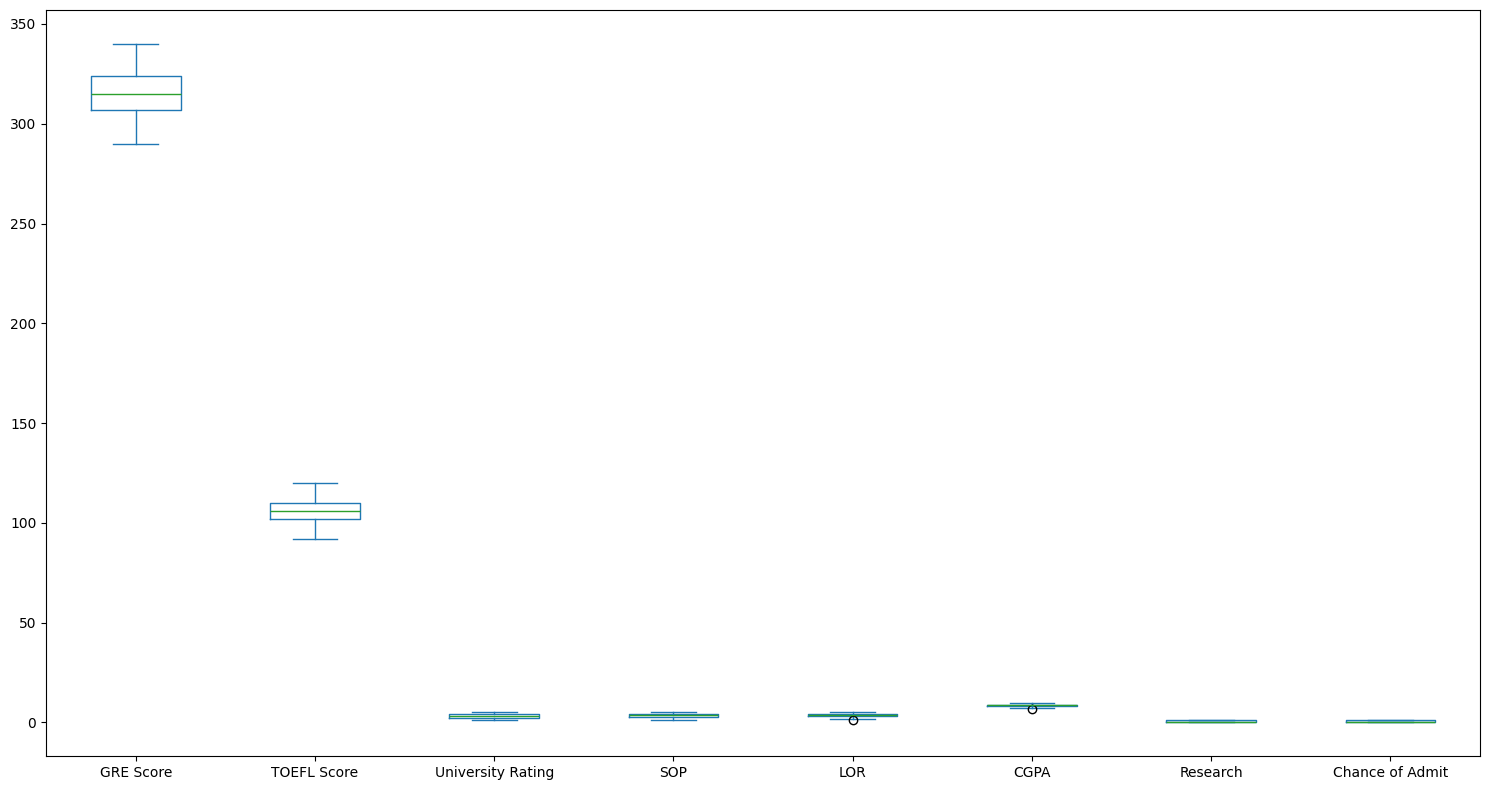

In [ ]:
# Check for Outliers
admission.plot(kind = "box")
plt.tight_layout()
plt.show()

### Feature Engineering

In [ ]:
admission.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,290,104,4,2.0,2.5,7.46,0,0
1,290,100,1,1.5,2.0,7.56,0,0
2,290,104,4,2.0,2.5,7.46,0,1
3,293,97,2,2.0,4.0,7.80,1,0
4,293,97,2,2.0,4.0,7.80,1,0


In [ ]:
admission["GRE Score"].quantile(0.25),
admission["GRE Score"].quantile(0.50),
admission["GRE Score"].quantile(0.75)


(307.0, 315.0, 324.0)

In [6]:
def gre(x):
  if x<=307:
    return("One_Fourth")
  elif x <=315:
    return("Half")
  else:
    return("Three_Fourth")

In [7]:
admission["GRE_Cat"] = admission["GRE Score"].apply(gre)

In [8]:
admission["TOEFL Score"].quantile(0.25), admission["TOEFL Score"].quantile(0.50),

(102.0, 106.0)

In [9]:
def toefl(x):
  if x<=102:
    return("Cat1")
  elif x <=106:
    return("Cat2")
  else:
    return("Cat3")

In [10]:
admission["TOEFL_Cat"] = admission["TOEFL Score"].apply(toefl)

In [9]:
admission.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000
mean,315.037594,106.454887,2.928571,3.268797,3.359962,8.505639,0.473684,0.280075
std,11.282976,5.886228,1.115957,1.001000,0.876903,0.575004,0.499777,0.449458
min,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.000000
25%,307.000000,102.000000,2.000000,2.500000,3.000000,8.100000,0.000000,0.000000
50%,315.000000,106.000000,3.000000,3.500000,3.500000,8.465000,0.000000,0.000000
75%,324.000000,110.000000,4.000000,4.000000,4.000000,8.900000,1.000000,1.000000
max,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,1.000000


### About Scaling in Logistic Regression

* We need to scale the features so that the model is able to capture the patternw with ease.

* If we dont scale the data, model will take lot of time in converging and arriving at the best values of probability.

* Thus it is necessary to scale the dataset

In [11]:
nums = ["GRE Score", "TOEFL Score"]
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

for i in nums:
  admission.loc[:, i] = sc.fit_transform(pd.DataFrame(admission.loc[:, i]))

In [12]:
# Split the Data in X and y

X = admission.drop("Chance of Admit", axis = 1)
y = admission["Chance of Admit"]

In [13]:
# Dummies
dummyx = pd.get_dummies(X, drop_first = True)
xtrain, xtest, ytrain, ytest = train_test_split(dummyx, y,
                                                test_size = 0.20,
                                                random_state = 42)

In [14]:
# Logistic Regression Model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

lg = LogisticRegression()

pred = lg.fit(xtrain, ytrain).predict(xtest)
print(classification_report(ytest, pred))

              precision    recall  f1-score   support

           0       0.91      0.84      0.87        82
           1       0.58      0.72      0.64        25

    accuracy                           0.81       107
   macro avg       0.74      0.78      0.76       107
weighted avg       0.83      0.81      0.82       107



In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(ytest, pred)

matrix = pd.DataFrame(cm, columns = ["Predicted-0","Predicted-1"],
             index = ["Actual-0", "Actual-1"])

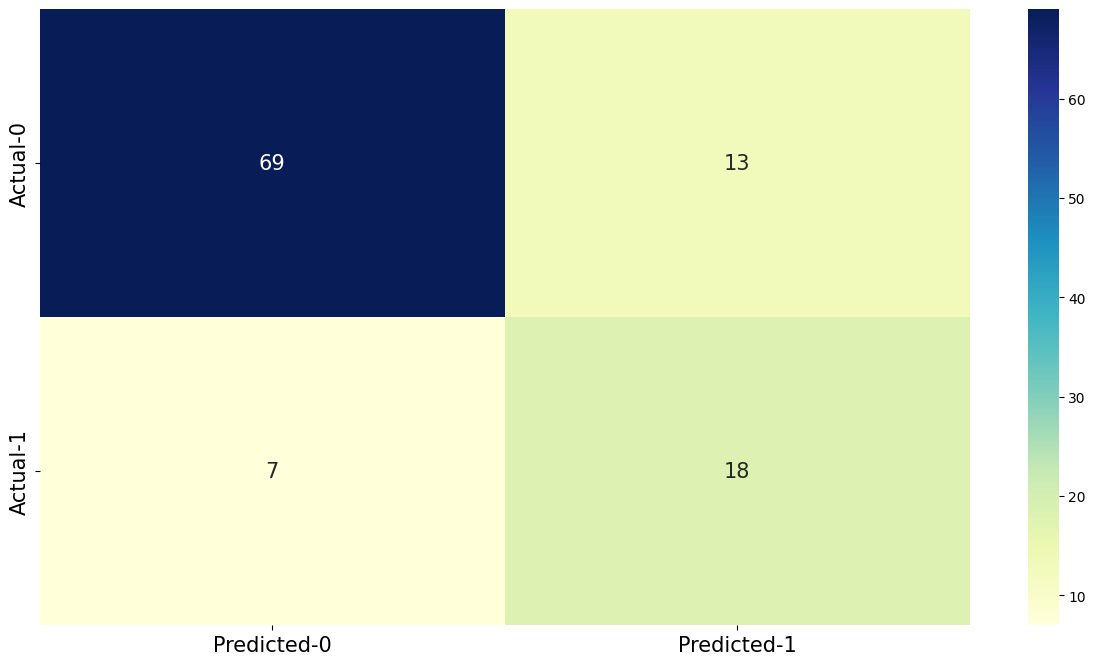

In [ ]:
# Lets plot the Matrix

sns.heatmap(matrix, annot = True,
            annot_kws = {'size':15}, cmap = "YlGnBu")
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.show()

https://scipython.com/blog/plotting-the-decision-boundary-of-a-logistic-regression-model/

### Imbalanced Class Problem

* Because my classes are highly Imbalanced and therefore, the model will give more weightage to the class with higher frequency.


* Therefore, we need to solve this Imbalanced problem. The two ways are **Oversampling** and **Undersampling**

* Undersampling means reducing the data from class 0 such that it equates with Class 1 creating balance

* The Above approach is not the correct approach because in eliminating data, we loose information which can be detrimental for the Model.

* More Suited Approach is **Oversampling of the Minority Class**

* We artificially increase the Sample Size of the Minority Class and this process is known as **SMOTE**

* SMOTE stands for Synthetic Minority Oversampling Technique.


In [15]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy = "minority", random_state = 42)

# Create New Sample Data by applying SMOTE
smote_X, smote_y = smote.fit_resample(dummyx, y)

xtrain, xtest, ytrain, ytest = train_test_split(smote_X, smote_y,
                                                test_size = 0.20,
                                                random_state = 42)
# Initiate the Machine Instance
logreg = LogisticRegression()

pred_smote = logreg.fit(xtrain, ytrain).predict(xtest)
print(classification_report(ytest, pred_smote))

              precision    recall  f1-score   support

           0       0.84      0.83      0.83        76
           1       0.84      0.85      0.84        78

    accuracy                           0.84       154
   macro avg       0.84      0.84      0.84       154
weighted avg       0.84      0.84      0.84       154



In [16]:
# Cohen's Kappa Score
from sklearn.metrics import cohen_kappa_score
cohen_kappa_score(ytest, pred_smote)

# It is a reliability metric as how much can I rely on the Model
# Higher the Kappa Score, better the Model
# Threshold of Kappa is 50%. For Imbalanced dataset, it is the goto metric.
# In other words, if the Kappa Score is higher, it means that there is
# a strong agreement between actual and the predicted values.


0.6752151172599967

### Feature Selection  Technique

* When the Data has lot of features, it becomes important to know which of the features have a higher impact on the Prediction.

* For this, we use Feature Selection techniques.

* SFS - Sequential Feature Selector & RFE - Recursive Feature Elimination.

* In SFS, you do not need to tell the model how many features are the appropriate for the Prediction where in RFE, you need to the define the Number of Features


In [25]:
# Recursive Feature Elimination (RFE)
from sklearn.feature_selection import RFE
rfe = RFE(logreg, n_features_to_select = None)

# Fit the RFE Model
rfemodel = rfe.fit(xtrain, ytrain)
feats = pd.Series(rfemodel.ranking_, index = xtrain.columns)

# Select those features which have a Rank of 1
feats[feats==1].index

Index(['LOR', 'CGPA', 'Research', 'GRE_Cat_One_Fourth', 'TOEFL_Cat_Cat3'], dtype='object')

### Statistical Model

In [31]:
import statsmodels.api as sma
selected_features = dummyx.loc[:, ['LOR', 'CGPA', 'Research',
                                   'GRE_Cat_One_Fourth', 'TOEFL_Cat_Cat3']]

# Convert True False into 1 & 0s
mapped = {True:1, False:0}

selected_features['GRE_Cat_One_Fourth'] =
selected_features['GRE_Cat_One_Fourth'].map(mapped)

selected_features['TOEFL_Cat_Cat3'] =
selected_features['TOEFL_Cat_Cat3'].map(mapped)

# Add Constant
selected_features = sma.add_constant(selected_features)

# Build the Model
model = sma.Logit(y, selected_features).fit()

# Run the Summary
print(model.summary())

Optimization terminated successfully.
         Current function value: 0.363381
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:        Chance of Admit   No. Observations:                  532
Model:                          Logit   Df Residuals:                      526
Method:                           MLE   Df Model:                            5
Date:                Tue, 07 Jan 2025   Pseudo R-squ.:                  0.3872
Time:                        05:56:54   Log-Likelihood:                -193.32
converged:                       True   LL-Null:                       -315.49
Covariance Type:            nonrobust   LLR p-value:                 9.000e-51
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                -18.0918      3.153     -5.737      0.000     -24.272     -11.911
LOR  

In [38]:
odds = pd.DataFrame(np.exp(model.params), columns = ["Odds"])
np.round(odds, 2)


,Odds
const,0.00
LOR,1.76
CGPA,5.12
Research,2.04
GRE_Cat_One_Fourth,0.41
TOEFL_Cat_Cat3,2.85


Interpret LOR: The chances of getting admission increase by 1.76 times if there is 1 unit of increase in LOR keeping other variables constant.

Wald test

* it checks if the feature is important for the Model or not

* For a feature to be important, we use pvalue and if the pvalue is less than alpha, we reject the Ho meaning that the feature is Significant.

AIC

* AIC is a comparable metric that can be used to identify which of the model(s) are better.

* Lower the AIC, better the Model

In [40]:
# AIC Score
model.aic # Statistical Model

398.6372866897609

## Decision Tree

In [15]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(criterion = "entropy")
xtrain, xtest, ytrain, ytest = train_test_split(dummyx, y,
                                                test_size = 0.20,
                                                random_state = 42)

pred_dtree = dtree.fit(xtrain, ytrain).predict(xtest)
print(classification_report(ytest, pred_dtree))

              precision    recall  f1-score   support

           0       0.85      0.82      0.83        82
           1       0.46      0.52      0.49        25

    accuracy                           0.75       107
   macro avg       0.66      0.67      0.66       107
weighted avg       0.76      0.75      0.75       107



In [17]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy = "minority", random_state = 42)

# Create New Sample Data by applying SMOTE
smote_X, smote_y = smote.fit_resample(dummyx, y)
xtrain, xtest, ytrain, ytest = train_test_split(smote_X, smote_y,
                                                test_size = 0.20,
                                                random_state = 42)

dtree = DecisionTreeClassifier(criterion = "entropy")
pred = dtree.fit(xtrain, ytrain).predict(xtest)
print(classification_report(ytest, pred))

              precision    recall  f1-score   support

           0       0.82      0.89      0.86        76
           1       0.89      0.81      0.85        78

    accuracy                           0.85       154
   macro avg       0.85      0.85      0.85       154
weighted avg       0.85      0.85      0.85       154

